In [61]:
# KMeans Clustering and Analysis for Mall Customers

## Objective
# This project applies KMeans Clustering to segment mall customers based on their demographics and spending habits. The goal is to uncover distinct customer groups to inform marketing strategies and improve customer targeting.

##  Key Questions:
#  - What types of customers shop at the mall?
#  - Who are the biggest spenders?
#  - Are there low-income but high-spending individuals worth targeting?
#  - Can we tailor marketing campaigns to different customer groups?

## Tools & Libraries Used
#  - Python
#  - Pandas
#  - Matplotlib & Seaborn
#  - Scikit-learn


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler



In [ ]:
##  Dataset Overview

# We are using the Mall Customer Segmentation Data from Kaggle. It includes demographic and behavioral data for 200 customers:

# - `CustomerID`: Unique customer identifier
# - `Gender`: Male or Female
# - `Age`: Age of the customer
# - `Annual Income (k$)`: Annual income in thousands of dollars
# - `Spending Score (1-100)`: Assigned score based on purchasing behavior

# Initial inspection helps us understand the data distribution and spot any missing values or anomalies.


In [67]:

#reading in dataset
df = pd.read_csv('/Users/Ibk/Downloads/Mall_Customers.csv')

In [69]:
##  Beginning Exploratory Data Analysis (EDA)

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [25]:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


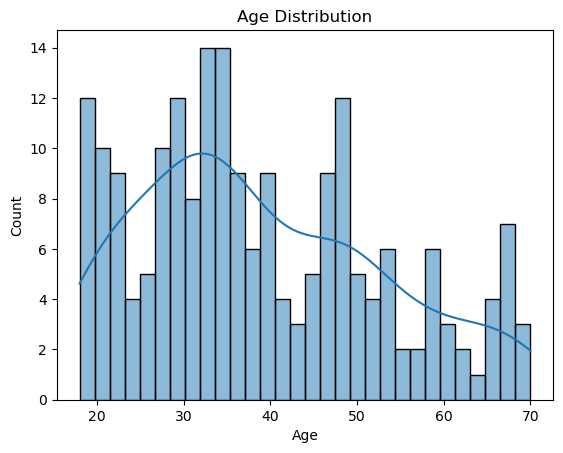

In [31]:
#visualizing age distribution 

sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

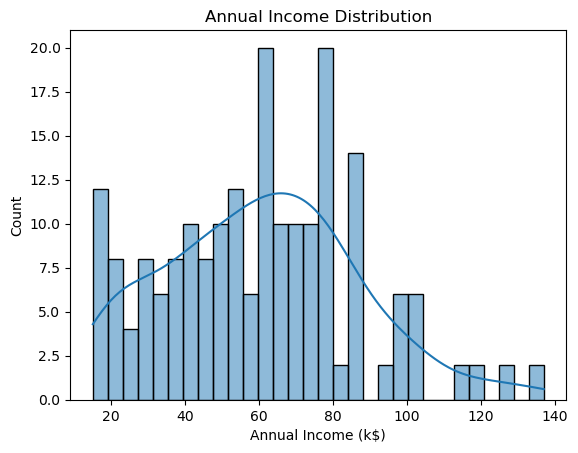

In [33]:
# Annual Income distribution

sns.histplot(df['Annual Income (k$)'], bins=30, kde=True)
plt.title('Annual Income Distribution')
plt.show()

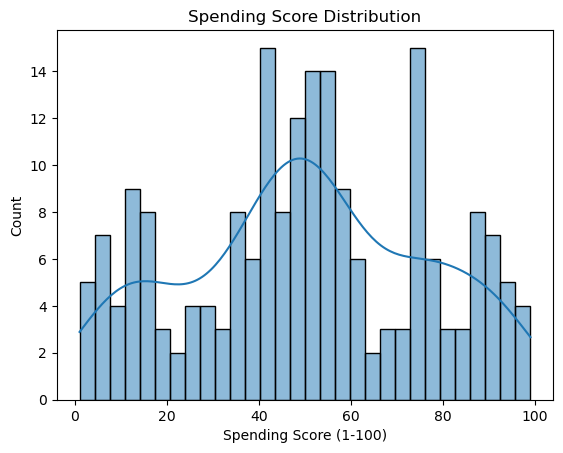

In [35]:
# Spending score distribution

sns.histplot(df['Spending Score (1-100)'], bins=30, kde=True)
plt.title('Spending Score Distribution')
plt.show()


In [37]:
# Encoding Gender column

df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})


In [41]:
#selecting and scaling to create clusters

X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X_scaled = StandardScaler().fit_transform(X)

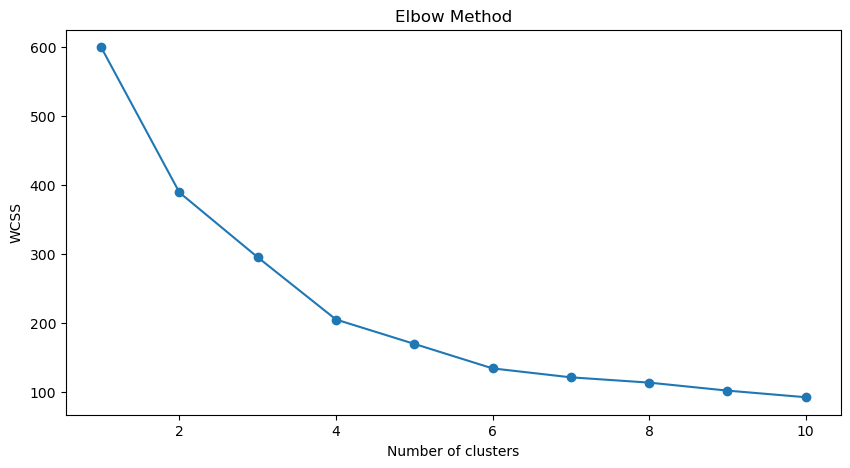

In [65]:
#Cluster the data using elbow method

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the results
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [47]:
# Applying KMeans clustering

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Adding cluster labels to the original dataframe
df['Cluster'] = y_kmeans


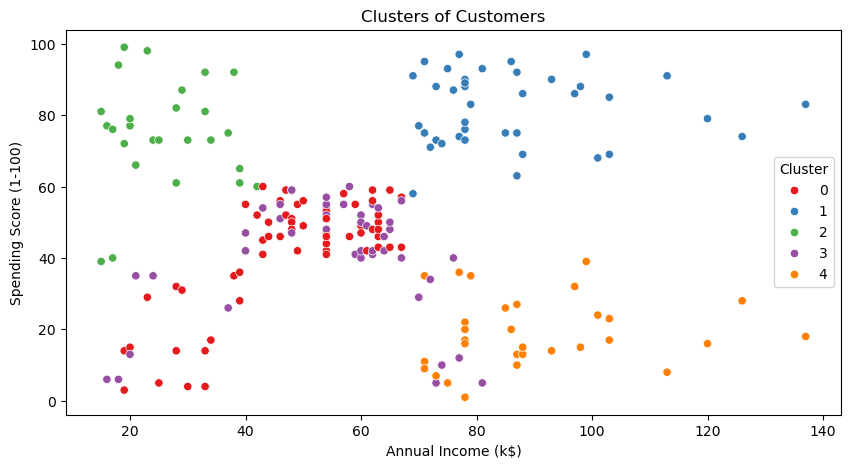

In [49]:
# Visualizing the Clusters

plt.figure(figsize=(10,5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1')
plt.title('Clusters of Customers')
plt.show()


In [63]:
    
# Grouping by cluster and calculating mean values
cluster_analysis = df.groupby('Cluster').mean()
print(cluster_analysis)


         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         68.775862  0.568966  55.275862           47.620690   
1        161.025000  0.550000  32.875000           86.100000   
2         23.461538  0.576923  25.769231           26.115385   
3         86.377778  0.600000  26.733333           54.311111   
4        166.870968  0.483871  44.387097           89.774194   

         Spending Score (1-100)  
Cluster                          
0                     41.706897  
1                     81.525000  
2                     74.846154  
3                     40.911111  
4                     18.483871  


In [2]:
# Each cluster represents a unique customer segment which will be analyzed and used to draw actionable insights.

# - Who are the high spenders?
# - Are there valuable but underserved groups?
# - What kinds of marketing campaigns would appeal to each segment?


# This analysis helps retailers develop data-driven marketing strategies.


In [3]:
#Cluster Insights

#Cluster 0: Young, low-income customers with high spending.
#Cluster 1: High-income, high-spending professionals — the most profitable group.
#Cluster 2: Older adults with moderate income and low spending.
#Cluster 3: Mid-income, low-spending group in their late 20s.
#Cluster 4: High-income customers who rarely spend — possibly disconnected from mall offerings.



In [4]:
#Business Implications

#Focus marketing efforts on high-spending segments (Clusters 1 and 2).

#Re-engage low-spending high-income customers with luxury offers or personalized outreach (Cluster 5).

#Design loyalty programs or discounts for price-sensitive shoppers.

#Use these insights to guide product placement, pricing, and customer experience strategies.

